In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
import json
import socket
from requests import get
from sklearn.neighbors import KNeighborsClassifier

In [6]:
def text2tap(text):
    tap = []
    for c in text.lower():
        if c == " ":
            tap.append((0,0))
            continue
        val = ord(c) - ord('a')
        right = val%5
        left = int(np.floor(val/5)%5)
        tap.append((left+1,right+1))
    return tap

def tap2text(tap):
    text = []
    for t in tap:
        v = (t[0]-1)*5+t[1]-1
        if v == -6:
            v = ord(" ") - ord('a')
        text.append(v)
    return "".join([chr(value + ord('a')) for value in text])
    

tap = text2tap("Hello friends")

# tap2text(tap)
tap


[(2, 3),
 (1, 5),
 (3, 2),
 (3, 2),
 (3, 5),
 (0, 0),
 (2, 1),
 (4, 3),
 (2, 4),
 (1, 5),
 (3, 4),
 (1, 4),
 (4, 4)]

C:\Users\jakob\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


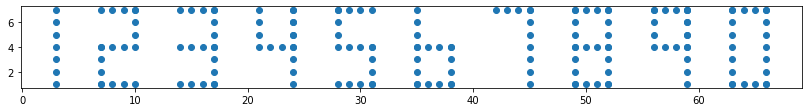

In [350]:
def n2points(n):
    top = np.array([[0,6],[1,6],[2,6],[3,6]])
    bottom = np.array([[0,0],[1,0],[2,0],[3,0]])
    mid = np.array([[0,3],[1,3],[2,3],[3,3]])
    left = np.array([[0,0],[0,1],[0,2],[0,3],[0,4],[0,5],[0,6]])
    right = np.array([[3,0],[3,1],[3,2],[3,3],[3,4],[3,5],[3,6]])
    topright = np.array([[3,4],[3,5],[3,6]])
    topleft = np.array([[0,4],[0,5],[0,6]])
    bottomright = np.array([[3,0],[3,1],[3,2],[3,3]])
    bottomleft = np.array([[0,0],[0,1],[0,2],[0,3]])

    if n == 0:
        return np.concatenate((top,bottom,left,right))
    if n == 1:
        return right
    if n == 2:
        return np.concatenate((top,topright,mid,bottomleft,bottom))
    if n == 3:
        return np.concatenate((right,top,mid,bottom))
    if n == 4:
        return np.concatenate((right,mid,topright,topleft))
    if n == 5:
        return np.concatenate((top, topleft,mid, bottomright,bottom))
    if n == 6:
        return np.concatenate((left,bottom,mid,bottomright))
    if n == 7:
        return np.concatenate((right,top))
    if n == 8:
        return np.concatenate((top,bottom,left,right,mid))
    if n == 9:
        return np.concatenate((top,right,mid,topright,topleft))
     
def text2points(text):
    points = []
    for i,c in enumerate(text):
        l = n2points(int(c))
        scl = np.ones(len(l))*7*i
        scl = np.stack((scl,np.ones(len(l))))
        
        new = l+scl.T
        points.append(new)
    return np.concatenate(np.array(points))


text = "1234567890"

out = text2points(text)

# out = np.power(out,1/3)*np.random.choice([-1,1],size = out.shape)

fig,axs = plt.subplots(figsize= (14,1.5))
axs.scatter(out[:,0],out[:,1])
plt.show()   


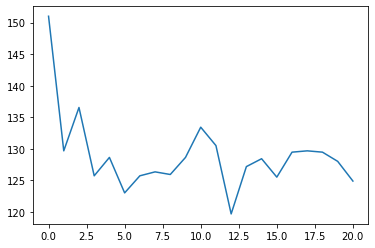

In [342]:
a = Image.open("C:/Users/jakob/Downloads/randomqr.png")    

def make_white_noise():
    # w, h = int(a.width/50), int(a.height/50)
    w,h = 35, 35
    ims = []
    for i in range(20):
        arr = np.random.choice([0,255],(w,h))
        img = PIL.Image.fromarray(arr)
        ims.append(img)
        # SAVE IMAGE HERE
    return ims

ims = make_white_noise()
mns = [np.mean(a)]
for i in ims:
    mns.append(np.mean(i))
plt.plot(mns)

In [353]:
def get_location():
    ip_address = get('https://api.ipify.org').content.decode('utf8')
    # print('My public IP address is: {}'.format(ip_address))

    # URL to send the request to
    request_url = 'https://geolocation-db.com/jsonp/' + ip_address
    # Send request and decode the result
    response = requests.get(request_url)
    result = response.content.decode()
    # Clean the returned string so it just contains the dictionary data for the IP address
    result = result.split("(")[1].strip(")")
    # Convert this data into a dictionary
    result  = json.loads(result)
    # print(result)

    loc = result['city']+result['country_name']
    return loc

get_location()

'CopenhagenDenmark'

In [320]:
def str2dna(string):
    letters = ['a','c','g','t']   
    dna = ""
    for c in string.lower():
        v = ord(c)#-ord('a')
        
        s = [letters[k%4] for k in [abs(int(v/(4**i))) for i in range(3)]]
        dna += "".join(s)
    return dna

str2dna("argspilarnulf")


'caggattcgtataatcggatgcaggatgtgcctatggcg'

In [329]:
def ouija_clipboard():
    # hello goodbye awaken when who where  
    state = "sleep"

    while True:
        pp =  pyperclip.paste()
        if state == "sleep" and pp == "awaken":
            pyperclip.copy("I have been awakened")
            state = "awake"
        elif state == "awake" and pp == "hello":
            pyperclip.copy("Hello my dear friend")
            state = "talking"
        elif state == "talking":
            if pp == "where":
                pyperclip.copy("In Zerzura - what should have been the capital of the world")
            if pp == "who":
                pyperclip.copy("Arnulf give me some flavour here.")
            if pp == "when":
                pyperclip.copy("Before some wars, after some others. You call it 1909.")
            if pp == "goodbye":
                pyperclip.copy("I will return to my slumber")
                break
        time.sleep(1)
